In [1]:
import datetime
import json
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tx_fast_hydrology.muskingum import Muskingum, ModelCollection, Connection
from tx_fast_hydrology.simulation import AsyncSimulation

In [2]:
# Define model file input path
input_path = '../data/travis-county-lo-res-model-partitioned.json'
# Load model collection from file
model_collection = ModelCollection.from_file(input_path)

Text(0.5, 1.0, 'Sub-models')

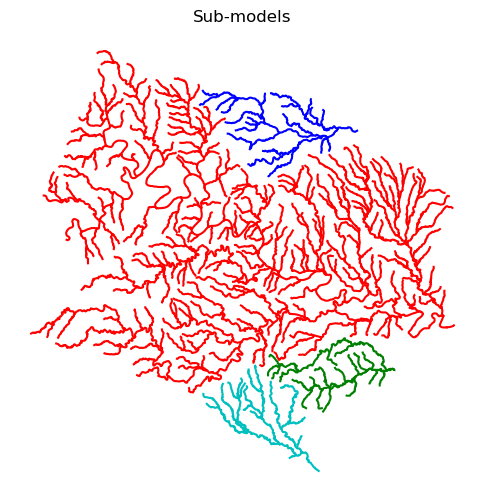

In [6]:
# Plot model collection with sub-models in different colors
colors = ['b', 'r', 'g', 'c']
count = 0
fig, ax = plt.subplots(figsize=(6,6))
for model_name, model in model_collection.models.items():
    model.plot(ax=ax, c=colors[count] )
    count += 1
plt.axis('off')
plt.title('Sub-models')

In [7]:
# Load JSON from file
with open('../data/travis-county-lo-res-model-partitioned.json') as f:
    data = json.load(f)

In [8]:
# Specify the reach_ids you want
target_reach_ids = ["5781223", "5781221", "5781703"]  # Replace with actual IDs

# the reach_ids are in model 1
reach_ids = data['models']['1']['model']['reach_ids']

# Find the indices of the desired reach_ids
indices = [i for i, rid in enumerate(reach_ids) if rid in target_reach_ids]

# Retrieve corresponding values from other arrays using those indices
model = data['models']['1']['model']
filtered_data = {
    'reach_ids': [model['reach_ids'][i] for i in indices],
    'startnodes': [model['startnodes'][i] for i in indices],
    'endnodes': [model['endnodes'][i] for i in indices],
    'K': [model['K'][i] for i in indices],
    'X': [model['X'][i] for i in indices],
    'o_t': [model['o_t'][i] for i in indices],
    'dx': [model['dx'][i] for i in indices],
    'paths': [model['paths'][i] for i in indices],
}

#indices are [333, 334, 335]
filtered_data['startnodes'] = [0,1,2] #[333, 334, 335]
filtered_data['endnodes'] = [0,0,0] #[417, 333, 333]

In [9]:
filtered_data['datetime'] = '2024-12-31T23:58:00+00:00'
filtered_data['timedelta'] = 'P0DT0H2M0S'
filtered_data['name'] = "SHL"
filtered_data = {'model': filtered_data}
filtered_data['sinks'] = []
filtered_data['sources'] = []
filtered_data = {'SHL': filtered_data}
filtered_data = {'models': filtered_data}
filtered_data['connections'] = {}
filtered_data.keys()

dict_keys(['models', 'connections'])

In [10]:
with open('../data/filtered_shoal.json', 'w') as f:
    json.dump(filtered_data, f, indent=2)

In [11]:
shoal_container =  ModelCollection.from_file('../data/filtered_shoal.json')
#shoal_container.dump_model_collection('../data/shoal_nwm.json')

In [12]:
# Read dumped model files
shoal_container = ModelCollection.from_file('../data/filtered_shoal.json')

Text(0.5, 1.0, 'Shoal')

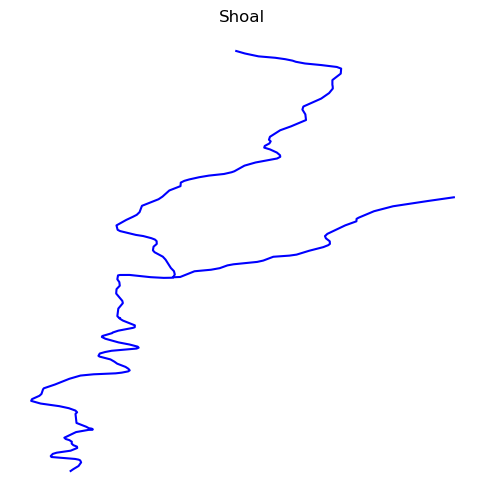

In [13]:
# Shoal creek
fig, ax = plt.subplots(figsize=(6,6))
for model_name, model in shoal_container.models.items():
    model.plot(ax=ax, c='b')
plt.axis('off')
plt.title('Shoal')